In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import argparse
import tensorflow as tf
import os
import shutil
import itertools
import random
import glob
import pandas as pd
from pathlib import Path
from shutil import copyfile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from zipfile import *

In [5]:
with ZipFile('/content/yawning_dataset_labeled.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [6]:
INIT_LR = 1e-4
EPOCHS = 10
BS = 32

In [7]:
DIRa = '/content/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/nomal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

15631
15670


In [8]:
if os.path.isdir('train/yawning') is False:
    os.makedirs('train/normal')
    os.makedirs('validation/normal')
    os.makedirs('test/normal')
    os.makedirs('train/yawning')
    os.makedirs('validation/yawning')
    os.makedirs('test/yawning')

In [9]:
for c in random.sample(glob.glob('yawning/*.jpg'), 11700):
    shutil.move(c, 'train/yawning')
for c in random.sample(glob.glob('yawning/*.jpg'), 2340):
    shutil.move(c, 'test/yawning')
for c in random.sample(glob.glob('yawning/*.jpg'), 1560):
    shutil.move(c, 'validation/yawning')
for c in random.sample(glob.glob('nomal/*.jpg'), 11700):
    shutil.move(c, 'train/normal')
for c in random.sample(glob.glob('nomal/*.jpg'), 2340):
    shutil.move(c, 'test/normal')
for c in random.sample(glob.glob('nomal/*.jpg'), 1560):
    shutil.move(c, 'validation/normal')

In [10]:
DIRa = '/content/train/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/train/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/test/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/test/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/validation/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/validation/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

11700
11700
2340
2340
1560
1560


In [25]:
train_path = 'train'
validation_path = 'validation'
test_path = 'test'

In [26]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['yawning', 'normal'], batch_size=10)
validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=validation_path, target_size=(224,224), classes=['yawning', 'normal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['yawning', 'normal'], batch_size=10, shuffle=False)

Found 23400 images belonging to 2 classes.
Found 3120 images belonging to 2 classes.
Found 4680 images belonging to 2 classes.


In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from shutil import copyfile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
vgg19_model = tf.keras.applications.vgg19.VGG19()

In [29]:
model_4 = Sequential()
for layer in vgg19_model.layers[:-9]:
  model_4.add(layer)

In [30]:
model_4.add(Flatten())
model_4.add(Dense(units=2, activation='softmax'))

In [31]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
h = model_4.fit(x=train_batches, validation_data=validation_batches, epochs=10, verbose=2)

Epoch 1/10
2340/2340 - 424s - loss: 0.6496 - accuracy: 0.9286 - val_loss: 0.1041 - val_accuracy: 0.9631
Epoch 2/10
2340/2340 - 422s - loss: 0.0929 - accuracy: 0.9660 - val_loss: 0.0565 - val_accuracy: 0.9804
Epoch 3/10
2340/2340 - 419s - loss: 0.0925 - accuracy: 0.9662 - val_loss: 0.1127 - val_accuracy: 0.9571
Epoch 4/10
2340/2340 - 418s - loss: 0.0804 - accuracy: 0.9716 - val_loss: 0.0653 - val_accuracy: 0.9776
Epoch 5/10
2340/2340 - 417s - loss: 0.0748 - accuracy: 0.9744 - val_loss: 0.0893 - val_accuracy: 0.9660
Epoch 6/10
2340/2340 - 415s - loss: 0.0565 - accuracy: 0.9797 - val_loss: 0.0671 - val_accuracy: 0.9750
Epoch 7/10
2340/2340 - 414s - loss: 0.0564 - accuracy: 0.9797 - val_loss: 0.0452 - val_accuracy: 0.9827
Epoch 8/10
2340/2340 - 414s - loss: 0.0493 - accuracy: 0.9824 - val_loss: 0.0511 - val_accuracy: 0.9814
Epoch 9/10
2340/2340 - 413s - loss: 0.0454 - accuracy: 0.9846 - val_loss: 0.0621 - val_accuracy: 0.9753
Epoch 10/10
2340/2340 - 412s - loss: 0.0393 - accuracy: 0.9858 -

In [23]:
model_4.save('vgg19_yawning.h5')

In [35]:
predictions = model_4.predict(x=test_batches, verbose=0)

In [36]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [37]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    
    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, cm[i, j],
                horizontalalignment="center",
                color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix without normalization
[[2305   35]
 [  54 2286]]


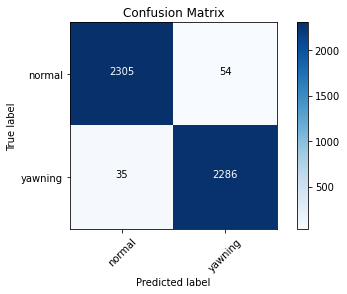

In [39]:
cm_plot_labels = ['normal', 'yawning']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [40]:
(cm[0,0] + cm[1,1])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) * 100

98.09829059829059

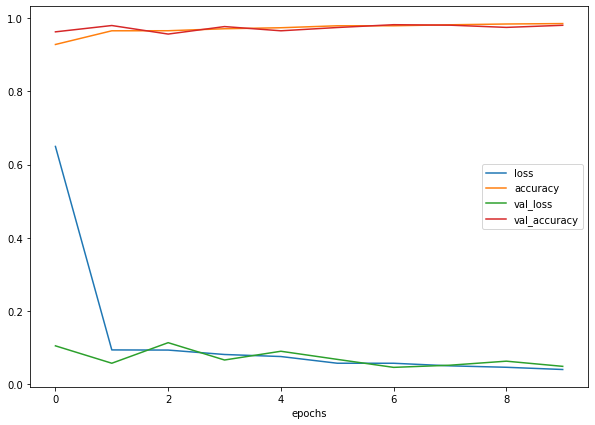

In [41]:
pd.DataFrame(h.history).plot(figsize=(10,7), xlabel="epochs");

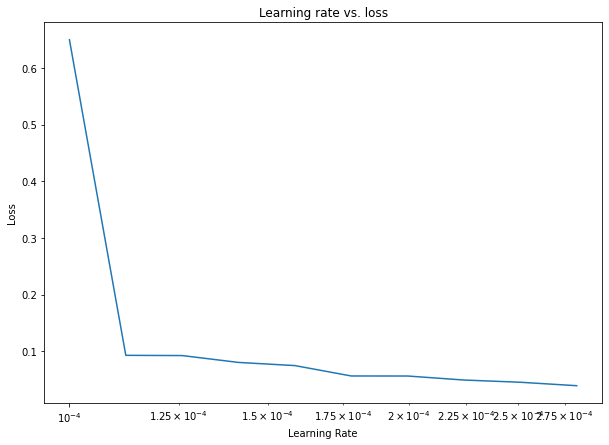

In [42]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, h.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [43]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
y_true = test_batches.classes
print(classification_report(y_true=y_true, y_pred=np.argmax(predictions, axis=-1), target_names=["yawning","normal"]))

              precision    recall  f1-score   support

     yawning       0.98      0.99      0.98      2340
      normal       0.98      0.98      0.98      2340

    accuracy                           0.98      4680
   macro avg       0.98      0.98      0.98      4680
weighted avg       0.98      0.98      0.98      4680

